# Ghana Mining License Report

1. How many licenses has been given so far?
2. Examine the license statuses per the data
3. Which year saw the highest number of licenses given?
4. What is the trend of licensing?
5. Which month sees the highest licensing given?
6. Does the licensing correlate with election years?
7. Which license type was commonly granted?
8. Which regions or districts are mining happening most? [Use Power BI]
9. Which minerals are commonly mined?
10. Which companies are having the highest number of licenses


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymysql
from sqlalchemy import create_engine
plt.style.use("ggplot")

In [2]:
# Read the data
raw_df = pd.read_csv("ghana_mining_license_report.csv")
raw_df.head(10)

,Start Date,License Code,Owner,Type,Status,Minerals,Regions
0,12/11/2025,SSML-T2 18/2025,Docklands Company Limited,Small Scale Licence (Tarkwa District),Active License,Gold,Western Region\nNzema East District
1,12/11/2025,SSML-T2 19/2025,Docklands Company Limited,Small Scale Licence (Tarkwa District),Active License,Gold,Western Region\nSekondi Takoradi District
2,12/11/2025,SSML-T2 21/2025,Docklands Company Limited,Small Scale Licence (Tarkwa District),Active License,Gold,Western Region\nSekondi Takoradi District
3,12/11/2025,SSML-T2 20/2025,Docklands Company Limited,Small Scale Licence (Tarkwa District),Active License,Gold,Western Region\nSekondi Takoradi District
4,12/11/2025,SSML-T2 17/2025,Docklands Company Limited,Small Scale Licence (Tarkwa District),Active License,Gold,Western Region\nMpohor District
5,03/10/2025,SSMP-NIM-3/1858,BRAKATU INVESTMENTS & COMMERCIAL FARMS LIMITED,Small Scale Licence (Assin Fosu District),Active License,Gold,Central Region
6,03/10/2025,SSMP-NIM-3/1856,Eknka Enterprise Limited,Small Scale Licence (Assin Fosu District),Active License,Gold,Central Region
7,03/10/2025,SSMP-NIM-3/1859,Eknka Enterprise Limited,Small Scale Licence (Assin Fosu District),Active License,Gold,Central Region
8,03/10/2025,SSMP-NIM-3/1857,BRAKATU INVESTMENTS & COMMERCIAL FARMS LIMITED,Small Scale Licence (Assin Fosu District),Active License,Gold,Central Region
9,03/10/2025,SSMP-NIM-3/1861,BRAKATU INVESTMENTS & COMMERCIAL FARMS LIMITED,Small Scale Licence (Assin Fosu District),Active License,Gold,Central Region\nCape Coast District


In [3]:
# Create a copy of the raw data
df_copy = raw_df.copy()

In [4]:
# Inspect the data
raw_df.shape

(1656, 7)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Start Date    1653 non-null   object
 1   License Code  1653 non-null   object
 2   Owner         1653 non-null   object
 3   Type          1653 non-null   object
 4   Status        1653 non-null   object
 5   Minerals      1651 non-null   object
 6   Regions       1361 non-null   object
dtypes: object(7)
memory usage: 90.7+ KB


In [6]:
# Check the columns and dtypes
print(raw_df.dtypes, "\n")
print(raw_df.columns)

Start Date      object
License Code    object
Owner           object
Type            object
Status          object
Minerals        object
Regions         object
dtype: object 

Index(['Start Date', 'License Code', 'Owner', 'Type', 'Status', 'Minerals',
       'Regions'],
      dtype='object')


In [7]:
# Standardise column names
raw_df.columns = (raw_df.columns
                    .str.strip()
                    .str.lower()
                    .str.replace(" ", "_")
                 )

In [8]:
# Check if the changes worked
raw_df.columns

Index(['start_date', 'license_code', 'owner', 'type', 'status', 'minerals',
       'regions'],
      dtype='object')

In [9]:
# Handling datatype mismatch
# Convert the start_date to datetime dtype
raw_df["start_date"] = pd.to_datetime(raw_df["start_date"], dayfirst=True)

raw_df.dtypes

start_date      datetime64[ns]
license_code            object
owner                   object
type                    object
status                  object
minerals                object
regions                 object
dtype: object

In [10]:
# Check the data again
raw_df.head()

,start_date,license_code,owner,type,status,minerals,regions
0,2025-11-12,SSML-T2 18/2025,Docklands Company Limited,Small Scale Licence (Tarkwa District),Active License,Gold,Western Region\nNzema East District
1,2025-11-12,SSML-T2 19/2025,Docklands Company Limited,Small Scale Licence (Tarkwa District),Active License,Gold,Western Region\nSekondi Takoradi District
2,2025-11-12,SSML-T2 21/2025,Docklands Company Limited,Small Scale Licence (Tarkwa District),Active License,Gold,Western Region\nSekondi Takoradi District
3,2025-11-12,SSML-T2 20/2025,Docklands Company Limited,Small Scale Licence (Tarkwa District),Active License,Gold,Western Region\nSekondi Takoradi District
4,2025-11-12,SSML-T2 17/2025,Docklands Company Limited,Small Scale Licence (Tarkwa District),Active License,Gold,Western Region\nMpohor District


In [11]:
# Check for duplicates
raw_df[raw_df.duplicated(keep = "first")]

,start_date,license_code,owner,type,status,minerals,regions
1533,2019-05-02,RL2/165,Gan He Mining Resources Development Company Ltd,Mining Lease,Active License,Gold,Western Region\nSekondi Takoradi District
1572,2017-01-06,PL3/32,AUB International Ghana Limited,Mining Lease,Active License,Gold,Ashanti Region\nAtwima Nwabiagya District
1654,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1655,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Inspect the duplicates
raw_df[raw_df.duplicated(keep = False)]

,start_date,license_code,owner,type,status,minerals,regions
1532,2019-05-02,RL2/165,Gan He Mining Resources Development Company Ltd,Mining Lease,Active License,Gold,Western Region\nSekondi Takoradi District
1533,2019-05-02,RL2/165,Gan He Mining Resources Development Company Ltd,Mining Lease,Active License,Gold,Western Region\nSekondi Takoradi District
1571,2017-01-06,PL3/32,AUB International Ghana Limited,Mining Lease,Active License,Gold,Ashanti Region\nAtwima Nwabiagya District
1572,2017-01-06,PL3/32,AUB International Ghana Limited,Mining Lease,Active License,Gold,Ashanti Region\nAtwima Nwabiagya District
1653,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1654,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1655,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Remove the duplicates
raw_df.drop_duplicates(keep = "first", inplace = True)

In [14]:
# check for missing values
raw_df.isna().sum()

start_date        1
license_code      1
owner             1
type              1
status            1
minerals          3
regions         293
dtype: int64

In [15]:
# Remove rows with all missing data
raw_df.dropna(axis = 0, how = "all", inplace = True)

# check for missing values again
raw_df.isna().sum()

start_date        0
license_code      0
owner             0
type              0
status            0
minerals          2
regions         292
dtype: int64

In [16]:
# Inspect the rows with missing data
raw_df[raw_df.isna().any(axis = 1)]

,start_date,license_code,owner,type,status,minerals,regions
17,2025-07-28,SSML-AK5 2/2025,Shepherd Mining,Small Scale Licence (Akim Oda District),Active License,Gold,NaN
20,2025-06-24,MC 5551/2025,Grinding Media Ghana Limited,Support Service (Class A),Active License,Supply Mining equipment\nMine Consumables (gri...,NaN
24,2025-05-21,MC 5550/2025,Global Consolidated Mining Ltd,Support Service (Class A),Active License,Equipment Supply\nCivil works /engineering ser...,NaN
26,2025-02-21,MC 5398/2025,ASP CONSORTIUM LTD,Support Service (Class A),Active License,Contract Mining\nHaulage services,NaN
36,2025-01-20,MC 5360/2025,ATS GHANA LTD,Support Service (Class B),Active License,"Housekeeping Services\nCleaning, painting and ...",NaN
...,...,...,...,...,...,...,...
870,2024-01-01,MC 4854/2023,BRADKEN WEST AFRICA PTY LTD,Support Service (Class A),Active License,Install and reline grinding mills\nSupply crus...,NaN
949,2023-09-20,MC-EG 16/2024,Elite Minerals Ghana Limited,Gold Export (Buying & Export),Active License,Gold,NaN
1100,2022-12-31,MC-EG 23/2024,Danampco Company Limited,Gold Export (Buying & Export),Active License,Gold,NaN
1102,2022-12-30,MC-EG 16/2024,LEGEND PINE LTD,Gold Export (Buying & Export),Active License,Gold,NaN


In [17]:
# Extract the license type from the type column
raw_df = pd.concat([(raw_df["type"].str.extract(r"([\w\s-]+)\(?")
            .rename(columns = {0 : "license_type"})), 
            raw_df], axis = 1)

In [18]:
raw_df.head(3)

,license_type,start_date,license_code,owner,type,status,minerals,regions
0,Small Scale Licence,2025-11-12,SSML-T2 18/2025,Docklands Company Limited,Small Scale Licence (Tarkwa District),Active License,Gold,Western Region\nNzema East District
1,Small Scale Licence,2025-11-12,SSML-T2 19/2025,Docklands Company Limited,Small Scale Licence (Tarkwa District),Active License,Gold,Western Region\nSekondi Takoradi District
2,Small Scale Licence,2025-11-12,SSML-T2 21/2025,Docklands Company Limited,Small Scale Licence (Tarkwa District),Active License,Gold,Western Region\nSekondi Takoradi District


In [19]:
# Extract the district of operation from the region of operation
raw_df["district_of_operation"] = raw_df["regions"].str.extract(r"(.*)[Dd]istrict")

In [20]:
# Extract the region names from the region column
(raw_df["regions"].str.extractall(r"(.*[Rr]egion)")
 .reset_index()
 .head()
)

,level_0,match,0
0,0,0,Western Region
1,1,0,Western Region
2,2,0,Western Region
3,3,0,Western Region
4,4,0,Western Region


In [21]:
region_df = (raw_df["regions"].str.extractall(r"(.*[Rr]egion)")
             .reset_index()
             .drop(columns = 'match')
             .rename(columns = {0 : "region_of_operation"})
            )
region_df.head()


,level_0,region_of_operation
0,0,Western Region
1,1,Western Region
2,2,Western Region
3,3,Western Region
4,4,Western Region


In [22]:
# merge the regions_df with the original df
# This splits companies that operate in multiple regions into separate rows made distinct by the region of operations
# For instance in the raw df index 23 operates
# This was done to normalise the table in 1NF
# Irrelevant columns were then pruned

clean_df = (raw_df.merge(region_df, 
               left_index = True,
               right_on="level_0", 
               how = "left")
       .drop(columns = ["type", "regions", "level_0"])
       .reset_index(drop = True)
    )

In [23]:
# Rearange the columns
clean_df = clean_df[["start_date", "license_code", "owner", "license_type", 
         "status", "minerals", "region_of_operation", "district_of_operation"]]
clean_df.head()

,start_date,license_code,owner,license_type,status,minerals,region_of_operation,district_of_operation
0,2025-11-12,SSML-T2 18/2025,Docklands Company Limited,Small Scale Licence,Active License,Gold,Western Region,Nzema East
1,2025-11-12,SSML-T2 19/2025,Docklands Company Limited,Small Scale Licence,Active License,Gold,Western Region,Sekondi Takoradi
2,2025-11-12,SSML-T2 21/2025,Docklands Company Limited,Small Scale Licence,Active License,Gold,Western Region,Sekondi Takoradi
3,2025-11-12,SSML-T2 20/2025,Docklands Company Limited,Small Scale Licence,Active License,Gold,Western Region,Sekondi Takoradi
4,2025-11-12,SSML-T2 17/2025,Docklands Company Limited,Small Scale Licence,Active License,Gold,Western Region,Mpohor


In [24]:
# Clean the text columns
for col in clean_df.columns:
    if clean_df[col].dtype == "object":
        clean_df[col] = clean_df[col].str.strip()
        clean_df[col] = clean_df[col].replace({r"\n" : ", ", r"  " : r" "}, regex = True)
        if col == "owner":
            clean_df[col] = clean_df[col].str.title()
        

In [25]:
# Break down the start date into year, month and day
clean_df["start_year"] = clean_df["start_date"].dt.year
clean_df["start_month"] = clean_df["start_date"].dt.month
clean_df["start_day"] = clean_df["start_date"].dt.day

In [26]:
# Check the dataset
clean_df.head(3)

,start_date,license_code,owner,license_type,status,minerals,region_of_operation,district_of_operation,start_year,start_month,start_day
0,2025-11-12,SSML-T2 18/2025,Docklands Company Limited,Small Scale Licence,Active License,Gold,Western Region,Nzema East,2025,11,12
1,2025-11-12,SSML-T2 19/2025,Docklands Company Limited,Small Scale Licence,Active License,Gold,Western Region,Sekondi Takoradi,2025,11,12
2,2025-11-12,SSML-T2 21/2025,Docklands Company Limited,Small Scale Licence,Active License,Gold,Western Region,Sekondi Takoradi,2025,11,12


In [27]:
# Check the unique values in license type
set(clean_df["license_type"])

{'Export License for Holders of Mineral Rights',
 'Gold Export',
 'Mining Lease',
 'Prospecting Licence',
 'Reconnaissance Licence',
 'Restricted Mining Lease',
 'Restricted Prospecting License',
 'Small Scale Gold',
 'Small Scale Licence',
 'Small Scale Mining Licence',
 'Support Service',
 'Test Licence'}

In [28]:
# Clean the license_type column by standardising small scaled mining license type
clean_df["license_type"] = clean_df["license_type"].replace({"Small Scale.+" : "Small Scale Licence"}, regex = True)

# Check for the changes
set(clean_df["license_type"])

{'Export License for Holders of Mineral Rights',
 'Gold Export',
 'Mining Lease',
 'Prospecting Licence',
 'Reconnaissance Licence',
 'Restricted Mining Lease',
 'Restricted Prospecting License',
 'Small Scale Licence',
 'Support Service',
 'Test Licence'}

In [29]:
# Which license type was commonly granted
clean_df["license_type"].value_counts()

license_type
Small Scale Licence                             617
Support Service                                 557
Prospecting Licence                             224
Mining Lease                                    209
Restricted Mining Lease                         209
Gold Export                                      57
Reconnaissance Licence                            8
Export License for Holders of Mineral Rights      2
Test Licence                                      1
Restricted Prospecting License                    1
Name: count, dtype: int64

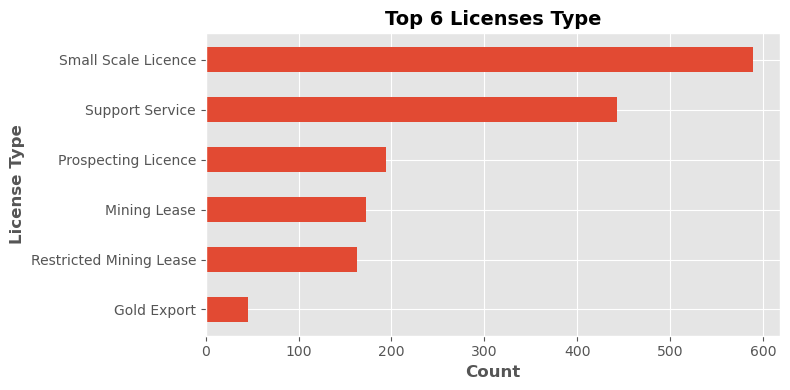

In [30]:
# # plot the top 6 licenses given
# sns.countplot(data = clean_df.drop_duplicates(subset="license_code"), 
#               y = "license_type", )
top_licenses = (clean_df
                 .drop_duplicates(subset="license_code")["license_type"]
                 .value_counts()[:6]
)

# Get the values to plot
labels = top_licenses.index
values = top_licenses.values

# Plot the data
fig, ax = plt.subplots(figsize = (8, 4))

ax.barh(y = labels,
        width = values,
        height = 0.5)

# Customise the data
ax.invert_yaxis()

ax.set_ylabel("License Type", fontweight = "bold")
ax.set_xlabel("Count", fontweight = "bold")
ax.set_title("Top 6 Licenses Type", fontweight = "bold", fontsize = 14)

plt.tight_layout()
plt.show()



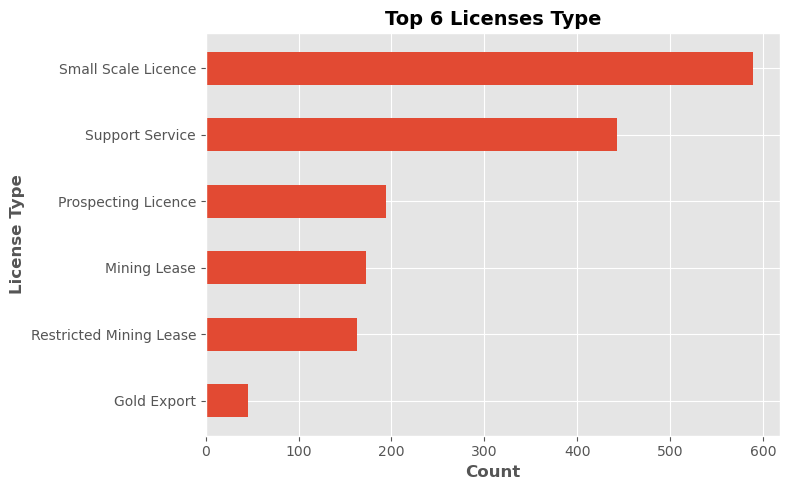

In [31]:
# # plot the top 6 licenses given
# sns.countplot(data = clean_df.drop_duplicates(subset="license_code"), 
#               y = "license_type", )
top_licenses = (clean_df
                 .drop_duplicates(subset="license_code")["license_type"]
                 .value_counts()[:6]
)

# Get the values to plot
labels = top_licenses.index
values = top_licenses.values

# Plot the data
fig, ax = plt.subplots(figsize = (8, 5))

ax.barh(y = labels,
        width = values,
        height = 0.5)

# Customise the data
ax.invert_yaxis()

ax.set_ylabel("License Type", fontweight = "bold")
ax.set_xlabel("Count", fontweight = "bold")
ax.set_title("Top 6 Licenses Type", fontweight = "bold", fontsize = 14)

plt.tight_layout()
plt.show()



In [32]:
clean_df["minerals"].value_counts()

minerals
Gold                                                                                               876
Granite                                                                                            137
Gold, Diamonds                                                                                      53
Diamonds, Gold                                                                                      43
., Gold                                                                                             36
                                                                                                  ... 
Mineral Processing equipment and spares exclusively                                                  1
Mechanical Services, Structural services, Piping                                                     1
Supply and repair pumps                                                                              1
Maintain mine water treatment facilities, Operate water treatmen

In [33]:
# Number of unique companies
clean_df["owner"].nunique()

1326

In [34]:
clean_df["minerals"].nunique()

353

In [35]:
# Distribution of the status
clean_df["status"].value_counts()

status
Active License    1843
Under Review        38
Suspended            4
Name: count, dtype: int64

In [36]:
set(clean_df["region_of_operation"])

{'Ahafo Region',
 'Ashanti Region',
 'Bono East Region',
 'Bono Region',
 'Brong Ahafo Region',
 'Central Region',
 'Eastern Region',
 'Greater Accra Region',
 'North East Region',
 'Northern Region',
 'Oti Region',
 'Savannah Region',
 'Upper East Region',
 'Upper West Region',
 'Volta Region',
 'Western North Region',
 'Western Region',
 nan}

In [37]:
# Export the data to sql
username = "root"
password = "MK_Of_94"
host = "localhost"
port = "3306"
database = "ghana_mining_license"

# Create connection engine
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

In [38]:
# # Export to sql
# clean_df.to_sql(
#     name="ghana_mining_license_data",   # Table name
#     con=engine,
#     if_exists="replace",              # or "append" to add without deleting existing
#     index=False,                      # Avoid exporting pandas index
#     chunksize=1000                    # Handle large datasets in batches
# )

In [55]:
# Export to csv
clean_df.to_csv("cleaned_mining_data.csv", index = False)

In [39]:
# How many licenses has been given so far?
clean_df["license_code"].nunique()

1619

In [40]:
# Examine the license statuses per the data
clean_df.groupby("status").size()

status
Active License    1843
Suspended            4
Under Review        38
dtype: int64

In [41]:
clean_df["status"].value_counts()

status
Active License    1843
Under Review        38
Suspended            4
Name: count, dtype: int64

In [42]:
# When was the first license given
clean_df["start_date"].min()

Timestamp('1995-04-19 00:00:00')

In [43]:
# When was the latest license given
clean_df["start_date"].max()

Timestamp('2025-11-12 00:00:00')

In [45]:
## Zooming in to small scale mining

small_scale_df = clean_df.query("license_type == 'Small Scale Licence'")

In [46]:
# Which year saw the highest number of licenses given?
annual_trends = (small_scale_df
                 .drop_duplicates(subset = "license_code")
                 .groupby("start_year")["license_code"].nunique()
                )
annual_trends

start_year
2012      1
2014      1
2016      2
2019      1
2020     94
2021     31
2022    137
2023     95
2024    192
2025     35
Name: license_code, dtype: int64

2025 has seen the highest licenses being granted

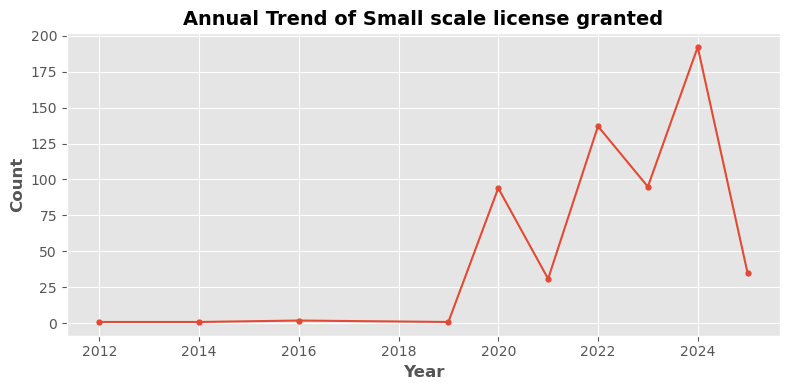

In [47]:
# Plot the number of small scale license given annually
# set up the plot
fig, ax = plt.subplots(figsize = (8,4))

# plot the values
ax.plot(annual_trends.index, annual_trends, "-o", markersize = 3.5)

# customise the chart
ax.set_ylabel("Count", fontweight = "bold")
ax.set_xlabel("Year", fontweight = "bold")
ax.set_title("Annual Trend of Small scale license granted", fontweight = "bold", fontsize = 14)

plt.tight_layout()
plt.show()


In [48]:
# Which month sees the highest small scale licensing given?
monthly_trends = (small_scale_df
                  .drop_duplicates(subset = "license_code")
                  .groupby("start_month")["license_code"].nunique()
                 )
monthly_trends

start_month
1      43
2      14
3      14
4      28
5      45
6      25
7     115
8      35
9      49
10     49
11     42
12    130
Name: license_code, dtype: int64

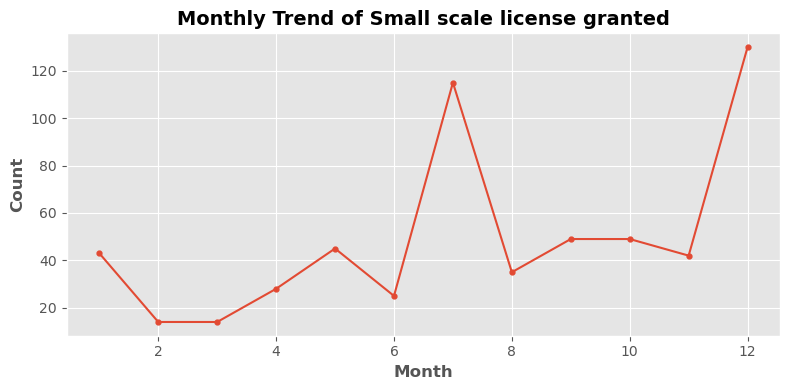

In [49]:
fig, ax = plt.subplots(figsize = (8,4))

# plot the values
ax.plot(monthly_trends.index, monthly_trends, "-o", markersize = 3.5)

# customise the chart
ax.set_ylabel("Count", fontweight = "bold")
ax.set_xlabel("Month", fontweight = "bold")
ax.set_title("Monthly Trend of Small scale license granted", fontweight = "bold", fontsize = 14)

plt.tight_layout()
plt.show()


Small scale mining licenses are typically given in August and December with December being the highest


**Does the small scale licensing correlate with election years?**

The number of small scale license given first spiked in 2020 (election year), peaked again in 20233(non-election year) and reached its all time high in 2024 when 192 small scale licenses were granted. 2012 to 2016 saw rather low amount of licenses granted

In [50]:
# Which regions or districts are small mining happening the most?
small_scale_df["region_of_operation"].value_counts()

region_of_operation
Western Region          168
Ashanti Region          150
Eastern Region          101
Central Region           99
Upper East Region        38
Western North Region     21
Ahafo Region             21
Brong Ahafo Region        4
Savannah Region           4
Upper West Region         3
North East Region         2
Northern Region           2
Oti Region                1
Name: count, dtype: int64

The Western, Ashanti, Eastern and Central regions have the most comapnies with small scale mining licenses

In [51]:
# 9. Which minerals are commonly mined?
small_scale_df["minerals"].value_counts()

minerals
Gold              522
Gold, Diamonds     52
Diamonds, Gold     42
Sand/ Gravel        1
Name: count, dtype: int64

Gold leads as the leading mineral which is mined small_scale. Followed by Golds and Diamonds (94)

In [52]:
clean_df.query("license_type == 'Prospecting Licence'")["region_of_operation"].value_counts()

region_of_operation
Western Region          52
Eastern Region          36
Central Region          34
Ashanti Region          31
Upper East Region       16
Bono Region             11
Upper West Region       11
Western North Region    10
Ahafo Region             8
Savannah Region          6
Brong Ahafo Region       3
Greater Accra Region     3
Volta Region             1
Bono East Region         1
North East Region        1
Name: count, dtype: int64

In [54]:
clean_df[clean_df["license_type"] == "Support Service"]["region_of_operation"].value_counts()

region_of_operation
Greater Accra Region    77
Ashanti Region          50
Western Region          36
Ahafo Region            20
Eastern Region          18
Upper East Region       13
Brong Ahafo Region      12
Western North Region    11
Central Region          11
Northern Region          7
Bono East Region         6
Bono Region              4
Upper West Region        4
Volta Region             3
North East Region        3
Savannah Region          2
Oti Region               2
Name: count, dtype: int64